<a href="https://colab.research.google.com/github/tanphat2008/AI/blob/main/AI_w4_24_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 21.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=455e061407bdba463b744c00cf386e1135481ef28a3b1317be5f9c654aa1da76
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


In [ ]:
x=np.arange(30,71,1)

In [ ]:
slow=fuzz.trimf(x,[30,30,40])

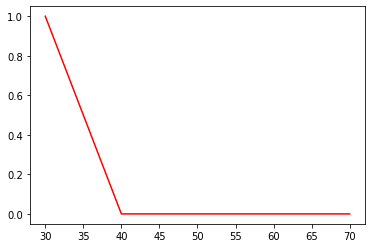

In [ ]:
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='SLOW')

In [ ]:
medium=fuzz.trimf(x,[30,40,50])
medium_fast=fuzz.trimf(x,[40,50,60])
full_speed=fuzz.trimf(x,[50,70,70])

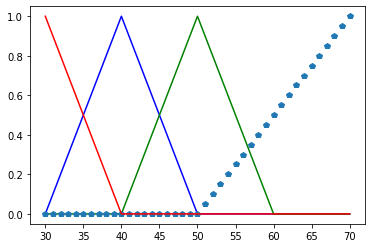

In [ ]:
plt.figure()
plt.plot(x,medium,'b',linewidth=1.5,label='MEDIUM')
plt.plot(x,medium_fast,'g',linewidth=1.5,label='MEDIUM_FAST')
plt.plot(x,full_speed,'p',linewidth=1.5,label='FULL_SPEED')
plt.plot(x,slow,'r',linewidth=1.5,label='SLOW')

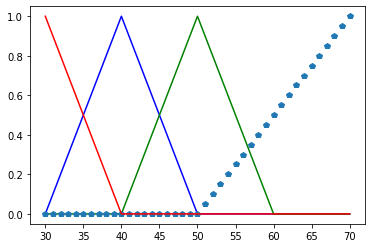

In [ ]:
slow=fuzz.trimf(x,[30,30,40])
medium=fuzz.trapmf(x,[30,40,40,50])
medium_fast=fuzz.trapmf(x,[40,50,50,60])
full_speed=fuzz.trimf(x,[50,70,70])
plt.figure()
plt.plot(x,medium,'b',linewidth=1.5,label='MEDIUM')
plt.plot(x,medium_fast,'g',linewidth=1.5,label='MEDIUM_FAST')
plt.plot(x,full_speed,'p',linewidth=1.5,label='FULL_SPEED')
plt.plot(x,slow,'r',linewidth=1.5,label='SLOW')

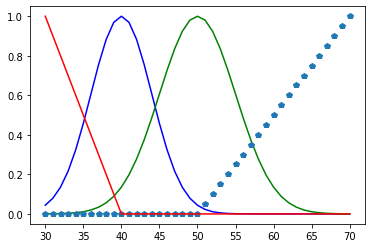

In [ ]:
slow=fuzz.trimf(x,[30,30,40])
medium=fuzz.gaussmf(x,40,4)
medium_fast=fuzz.gaussmf(x,50,5)
full_speed=fuzz.trimf(x,[50,70,70])
plt.figure()
plt.plot(x,medium,'b',linewidth=1.5,label='MEDIUM')
plt.plot(x,medium_fast,'g',linewidth=1.5,label='MEDIUM_FAST')
plt.plot(x,full_speed,'p',linewidth=1.5,label='FULL_SPEED')
plt.plot(x,slow,'r',linewidth=1.5,label='SLOW')

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

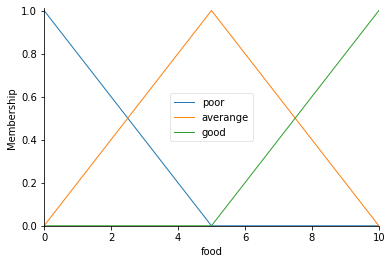

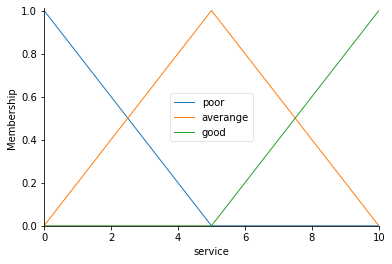

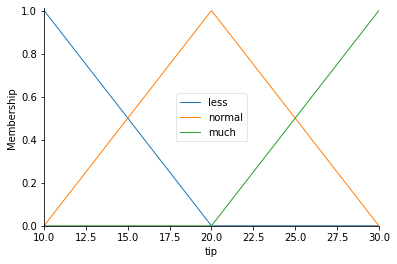

In [ ]:
food= ctrl.Antecedent(np.arange(0,11,1),'food')
service= ctrl.Antecedent(np.arange(0,11,1),'service')
tip= ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['averange']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])

service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['averange']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])

tip['less']=fuzz.trimf(tip.universe,[10,10,20])
tip['normal']=fuzz.trimf(tip.universe,[10,20,30])
tip['much']=fuzz.trimf(tip.universe,[20,30,30])

food.view()
service.view()
tip.view()

In [ ]:
rule1= ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2= ctrl.Rule(food['poor']&service['averange'],tip['less'])
rule3= ctrl.Rule(food['poor']&service['good'],tip['normal'])
rule4= ctrl.Rule(food['averange']&service['poor'],tip['less'])
rule5= ctrl.Rule(food['averange']&service['averange'],tip['normal'])
rule6= ctrl.Rule(food['averange']&service['good'],tip['normal'])
rule7= ctrl.Rule(food['good']&service['poor'],tip['normal'])
rule8= ctrl.Rule(food['good']&service['averange'],tip['much'])
rule9= ctrl.Rule(food['good']&service['good'],tip['much'])




26.66153846153846


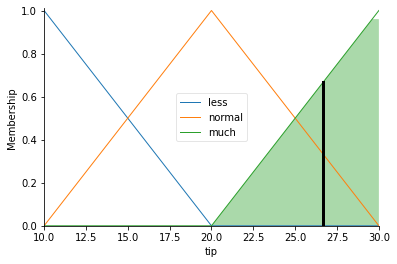

In [ ]:
tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=10
tipping.input['service']=9.8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

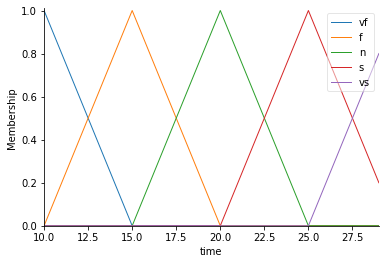

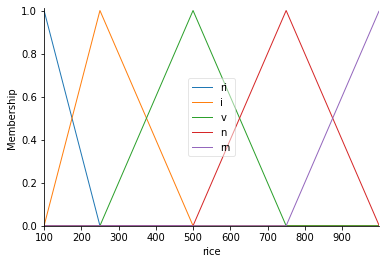

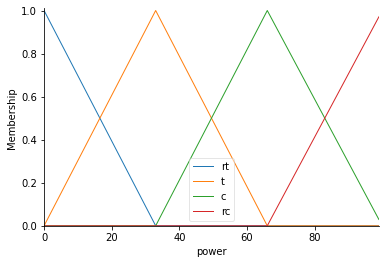

In [ ]:
time= ctrl.Antecedent(np.arange(10,30,1),'time')
rice= ctrl.Antecedent(np.arange(100,1000,1),'rice')
power= ctrl.Consequent(np.arange(0,100,1),'power')

time['vf']=fuzz.trimf(time.universe,[10,10,15])
time['f']=fuzz.trimf(time.universe,[10,15,20])
time['n']=fuzz.trimf(time.universe,[15,20,25])
time['s']=fuzz.trimf(time.universe,[20,25,30])
time['vs']=fuzz.trimf(time.universe,[25,30,30])

rice['ri']=fuzz.trimf(rice.universe,[100,100,250])      
rice['i']=fuzz.trimf(rice.universe,[100,250,500])
rice['v']=fuzz.trimf(rice.universe,[250,500,750])
rice['n']=fuzz.trimf(rice.universe,[500,750,1000])
rice['rn']=fuzz.trimf(rice.universe,[750,1000,1000])

power['rt']=fuzz.trimf(power.universe,[0,0,33])
power['t']=fuzz.trimf(power.universe,[0,33,66])
power['c']=fuzz.trimf(power.universe,[33,66,100])
power['rc']=fuzz.trimf(power.universe,[66,100,100])

time.view()
rice.view()
power.view()

# Mục mới

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
rule1= ctrl.Rule(time['vf']&rice['ri'],power['rt'])
rule2= ctrl.Rule(time['vf']&rice['i'],power['rt'])
rule3= ctrl.Rule(time['vf']&rice['v'],power['t'])
rule4= ctrl.Rule(time['vf']&rice['n'],power['t'])
rule5= ctrl.Rule(time['vf']&rice['rn'],power['c'])

rule6 = ctrl.Rule(time['f']&rice['ri'],power['rt'])
rule7 = ctrl.Rule(time['f']&rice['i'],power['t'])
rule8 = ctrl.Rule(time['f']&rice['v'],power['t'])
rule9 = ctrl.Rule(time['f']&rice['n'],power['c'])
rule10= ctrl.Rule(time['f']&rice['rn'],power['c'])

rule11= ctrl.Rule(time['n']&rice['ri'],power['t'])
rule12= ctrl.Rule(time['n']&rice['i'],power['t'])
rule13= ctrl.Rule(time['n']&rice['v'],power['c'])
rule14= ctrl.Rule(time['n']&rice['n'],power['c'])
rule15= ctrl.Rule(time['n']&rice['rn'],power['c'])

rule16= ctrl.Rule(time['s']&rice['ri'],power['t'])
rule17= ctrl.Rule(time['s']&rice['i'],power['c'])
rule18= ctrl.Rule(time['s']&rice['v'],power['c'])
rule19= ctrl.Rule(time['s']&rice['n'],power['c'])
rule20= ctrl.Rule(time['s']&rice['rn'],power['rc'])

rule21= ctrl.Rule(time['vs']&rice['ri'],power['c'])
rule22= ctrl.Rule(time['vs']&rice['i'],power['c'])
rule23= ctrl.Rule(time['vs']&rice['v'],power['rc'])
rule24= ctrl.Rule(time['vs']&rice['n'],power['rc'])
rule25= ctrl.Rule(time['vs']&rice['rn'],power['rc'])





66.31884057971017


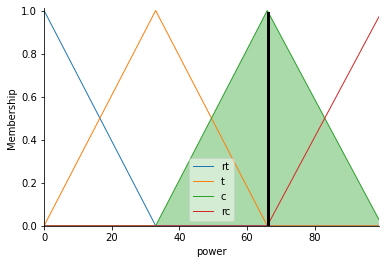

In [ ]:
power_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering=ctrl.ControlSystemSimulation(power_ctrl)
powering.input['time']=20
powering.input['rice']=500
powering.compute()
print(powering.output['power'])
power.view(sim=powering)